<a href="https://colab.research.google.com/github/santhosh1417ai/predicting-student-performance-/blob/main/Predicting_Students_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/project/Student_performance.csv'
student_data = pd.read_csv(file_path)
student_data_head = student_data.head()
student_data_head


,StudentID,gender,age,Ethnicity,parental level of education,lunch,test preparation course,StudyTimeWeekly,math score,reading score,writing score,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Attendance_Percentage
0,1001.0,female,17.0,group B,bachelor's degree,standard,none,19.83,72.0,72.0,74.0,0.0,0.0,1.0,0.0,2.93,2.0,56.0
1,1002.0,female,18.0,group C,some college,standard,completed,15.41,69.0,90.0,88.0,0.0,0.0,0.0,0.0,3.04,1.0,99.0
2,1003.0,female,15.0,group B,master's degree,standard,none,4.21,90.0,95.0,93.0,0.0,0.0,0.0,0.0,0.11,4.0,51.0
3,1004.0,male,17.0,group A,associate's degree,free/reduced,none,10.03,47.0,57.0,44.0,1.0,0.0,0.0,0.0,2.05,3.0,8.0
4,1005.0,male,17.0,group C,some college,standard,none,4.67,76.0,78.0,75.0,0.0,0.0,0.0,0.0,1.29,4.0,59.0


In [ ]:
student_data_info = student_data.info()
student_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   StudentID                    1000 non-null   float64
 1   gender                       1000 non-null   object 
 2   age                          1000 non-null   float64
 3   Ethnicity                    1000 non-null   object 
 4   parental level of education  1000 non-null   object 
 5   lunch                        1000 non-null   object 
 6   test preparation course      1000 non-null   object 
 7   StudyTimeWeekly              1000 non-null   float64
 8   math score                   1000 non-null   float64
 9   reading score                1000 non-null   float64
 10  writing score                1000 non-null   float64
 11  Extracurricular              1000 non-null   float64
 12  Sports                       1000 non-null   float64
 13  Music             

In [ ]:
summary_stats = student_data.describe()
summary_stats

,StudentID,age,StudyTimeWeekly,math score,reading score,writing score,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Attendance_Percentage
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000
mean,1500.500000,16.534000,9.681770,66.08900,69.169000,68.054000,0.38200,0.311000,0.19200,0.158000,1.90478,3.065000,50.28200
std,288.819436,1.151595,5.699936,15.16308,14.600192,15.195657,0.48612,0.463134,0.39407,0.364924,0.91099,1.166248,28.89369
min,1001.000000,15.000000,0.000000,0.00000,17.000000,10.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000
25%,1250.750000,15.000000,4.770000,57.00000,59.000000,57.750000,0.00000,0.000000,0.00000,0.000000,1.19000,2.000000,26.00000
50%,1500.500000,17.000000,9.615000,66.00000,70.000000,69.000000,0.00000,0.000000,0.00000,0.000000,1.91500,4.000000,52.00000
75%,1750.250000,18.000000,14.282500,77.00000,79.000000,79.000000,1.00000,1.000000,0.00000,0.000000,2.61000,4.000000,75.00000
max,2000.000000,18.000000,19.980000,100.00000,100.000000,100.000000,1.00000,1.000000,1.00000,1.000000,4.00000,4.000000,100.00000


In [ ]:
student_data.Ethnicity .value_counts()

,count
Ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [ ]:
student_data['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [ ]:
student_data['Total Score']=student_data['writing score']+student_data['reading score']+student_data['math score']
student_data[['writing score','reading score','math score','Total Score']].head(10)

,writing score,reading score,math score,Total Score
0,74.0,72.0,72.0,218.0
1,88.0,90.0,69.0,247.0
2,93.0,95.0,90.0,278.0
3,44.0,57.0,47.0,148.0
4,75.0,78.0,76.0,229.0
5,78.0,83.0,71.0,232.0
6,92.0,95.0,88.0,275.0
7,39.0,43.0,40.0,122.0
8,67.0,64.0,64.0,195.0
9,50.0,60.0,38.0,148.0


In [ ]:
student_data[' Extracurricular']=student_data['Sports']+student_data['Music']+student_data['Volunteering']
student_data[['Sports','Music','Volunteering',' Extracurricular']].head(10)

,Sports,Music,Volunteering,Extracurricular
0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0
8,1.0,0.0,1.0,2.0
9,0.0,0.0,0.0,0.0


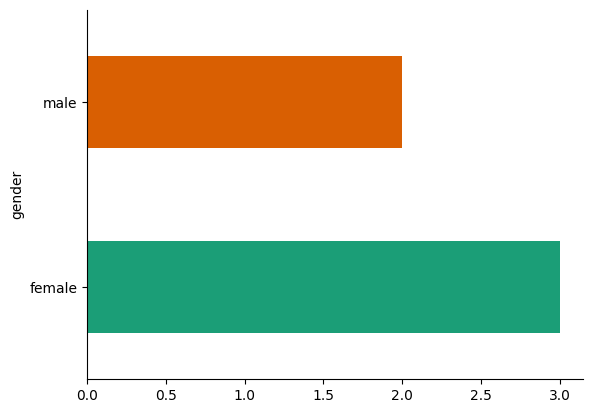

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
student_data_head.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

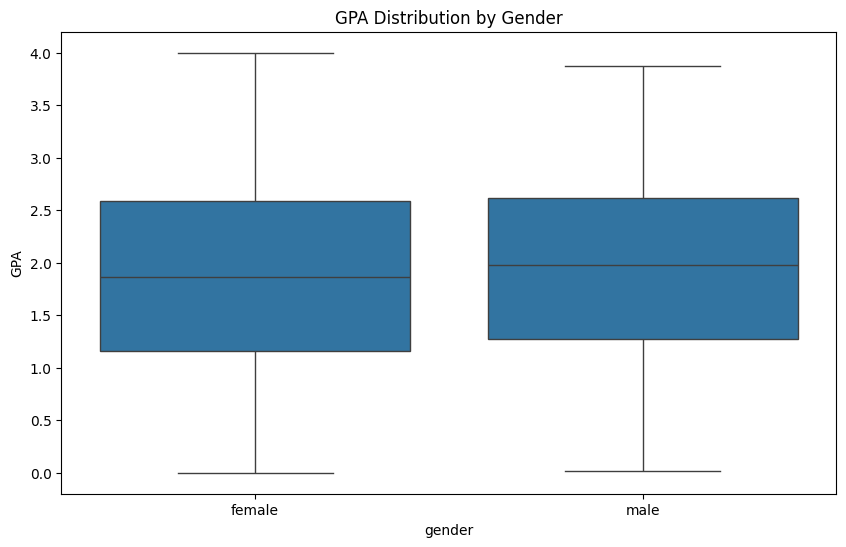

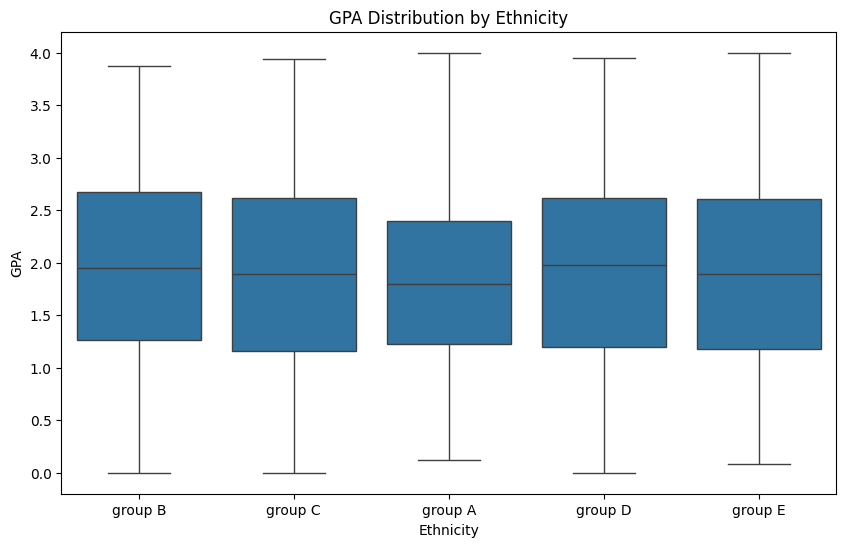

In [ ]:
# Box plot for GPA by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='GPA', data=student_data)
plt.title('GPA Distribution by Gender')
plt.show()

# Box plot for GPA by Ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ethnicity', y='GPA', data=student_data)
plt.title('GPA Distribution by Ethnicity')
plt.show()

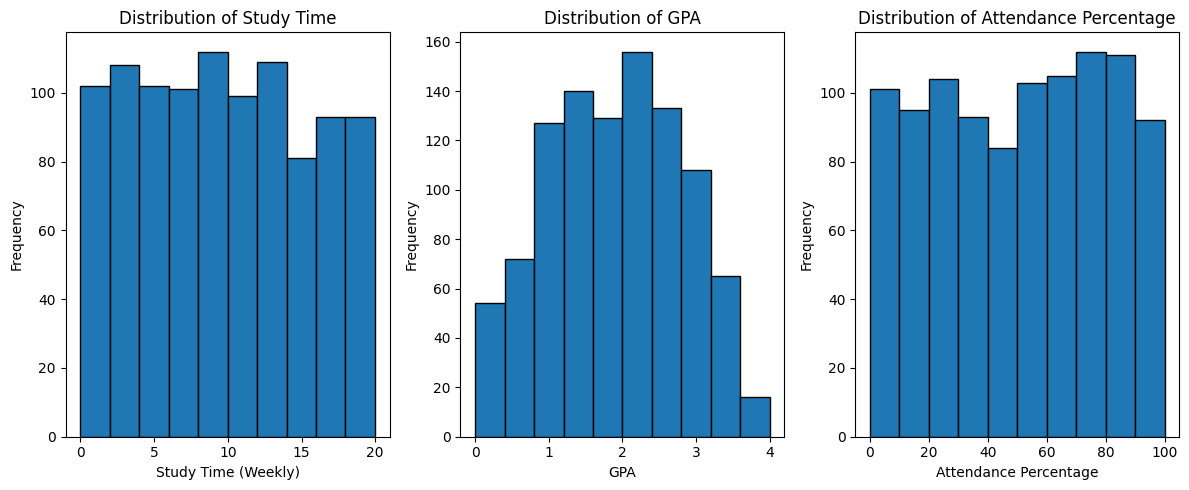

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.hist(student_data['StudyTimeWeekly'], bins=10, edgecolor='black')
plt.xlabel('Study Time (Weekly)')
plt.ylabel('Frequency')
plt.title('Distribution of Study Time')

plt.subplot(1, 3, 2)
plt.hist(student_data['GPA'], bins=10, edgecolor='black')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPA')

plt.subplot(1, 3, 3)
plt.hist(student_data['Attendance_Percentage'], bins=10, edgecolor='black')
plt.xlabel('Attendance Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Attendance Percentage')

plt.tight_layout()
plt.show()

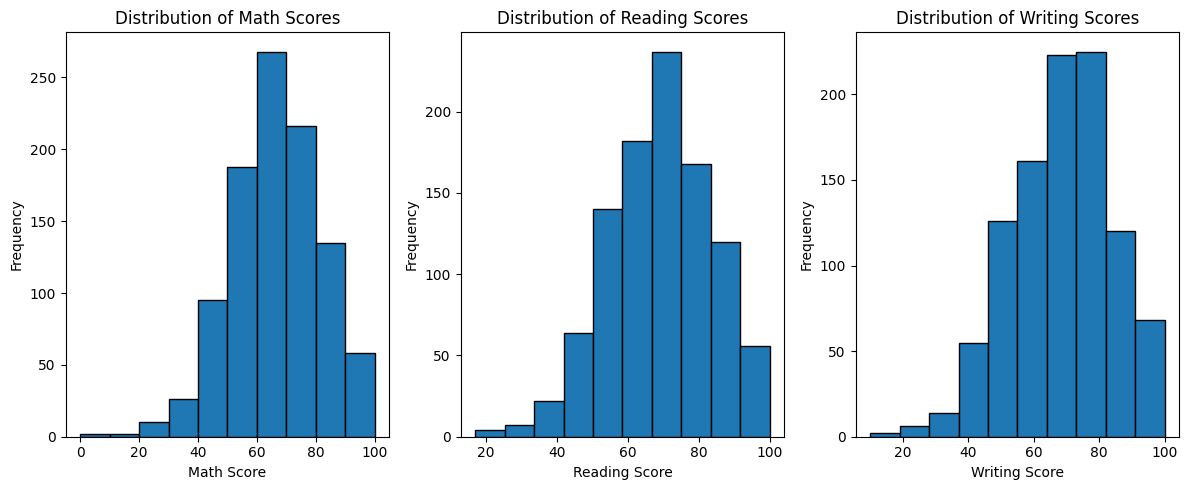

In [ ]:
# Plotting histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.hist(student_data['math score'], bins=10, edgecolor='black')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Distribution of Math Scores')

plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
plt.hist(student_data['reading score'], bins=10, edgecolor='black')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.title('Distribution of Reading Scores')

plt.subplot(1, 3, 3)
plt.hist(student_data['writing score'], bins=10, edgecolor='black')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.title('Distribution of Writing Scores')

plt.tight_layout()
plt.show()

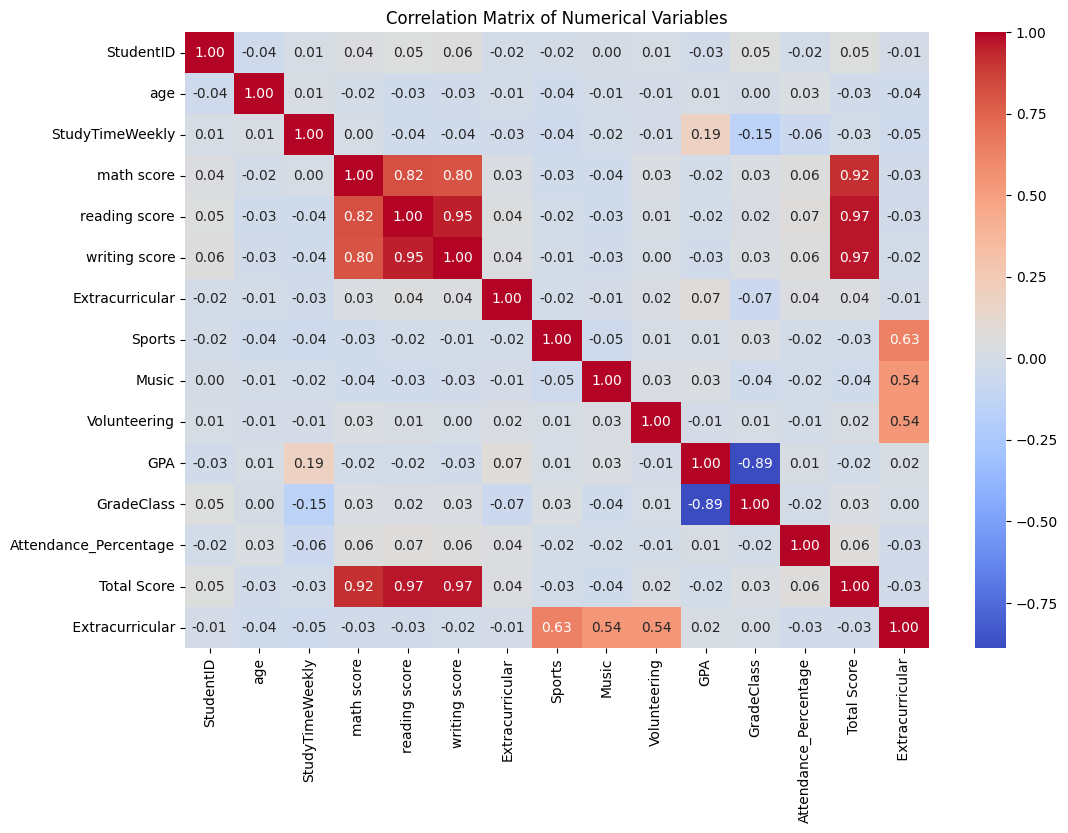

In [ ]:
plt.figure(figsize=(12, 8))
# Calculate correlation only for numeric columns
correlation_matrix = student_data.corr(numeric_only=True)

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

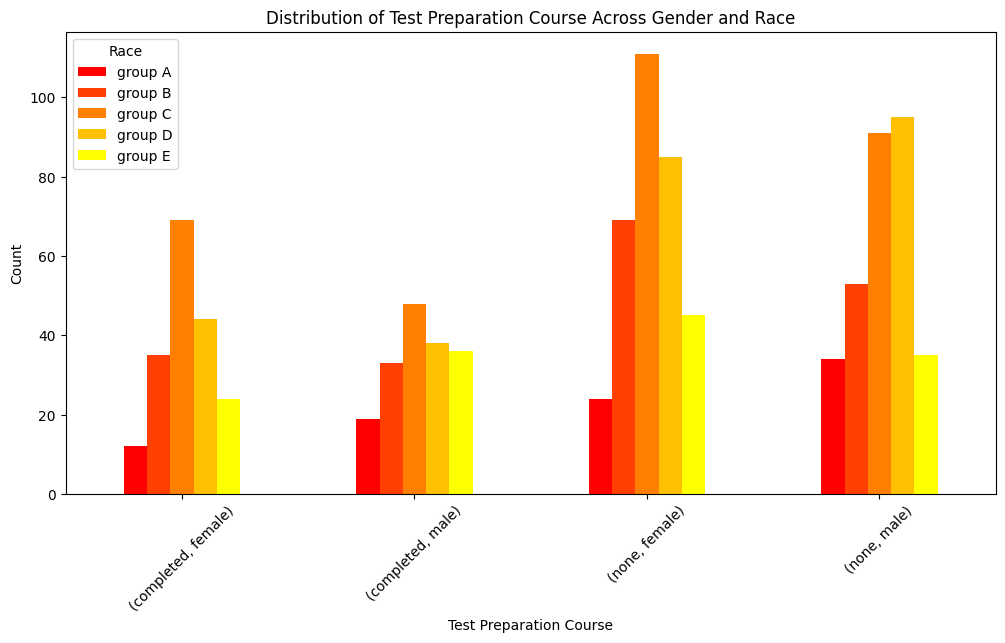

In [ ]:
course_counts = student_data.groupby(['test preparation course', 'gender', 'Ethnicity']).size().unstack(fill_value=0)

# Plot grouped bar plot
course_counts.plot(kind='bar', figsize=(12, 6), colormap='autumn')

# Add title and labels
plt.title('Distribution of Test Preparation Course Across Gender and Race')
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')

# Show legend
plt.legend(title='Race')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load your student data into a Pandas DataFrame called student_data
# Replace 'your_data_file.csv' with the actual path to your data file
student_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Student_performance.csv')

x = student_data.drop('Ethnicity', axis=1)

y = student_data['Ethnicity']

y = y.fillna(y.mode()[0])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, shuffle=True, random_state=15)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling missing values


# Load your student data into a Pandas DataFrame called student_data
student_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Student_performance.csv')

x = student_data.drop('Ethnicity', axis=1)
y = student_data['Ethnicity']

y = y.fillna(y.mode()[0])

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through categorical columns and encode them
for column in x.select_dtypes(include=['object']).columns:
    x[column] = label_encoder.fit_transform(x[column])

# Create a SimpleImputer to replace NaN with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training data and transform both train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, shuffle=True, random_state=15)
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_tesest)


# Create and train the model (Logistic Regression)
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.3521594684385382
Precision: 0.3166526864641583
Recall: 0.3521594684385382
F1-Score: 0.29129800035940234


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

student_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Student_performance.csv')

x = student_data.drop('GPA', axis=1)
y = student_data['GPA']

# Separate numeric and categorical features
numeric_features = x.select_dtypes(include=['number']).columns
categorical_features = x.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for LinearRegression

# Create a ColumnTransformer to apply transformers to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit and transform the features (x)
x = preprocessor.fit_transform(x)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

# Impute missing values in the target variable (y_train)
# Create a SimpleImputer for the target variable with strategy='mean' or other appropriate strategy
imputer_y = SimpleImputer(strategy='mean')
y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1))  # Reshape y_train to a 2D array
y_train = y_train.ravel() # Convert back to 1D array

# Create and train the model (Linear Regression)
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.3377791047332176
Mean Squared Error (MSE): 0.17968461134236904
R-squared (R2): 0.7763327613400146


In [11]:
!pip install shap

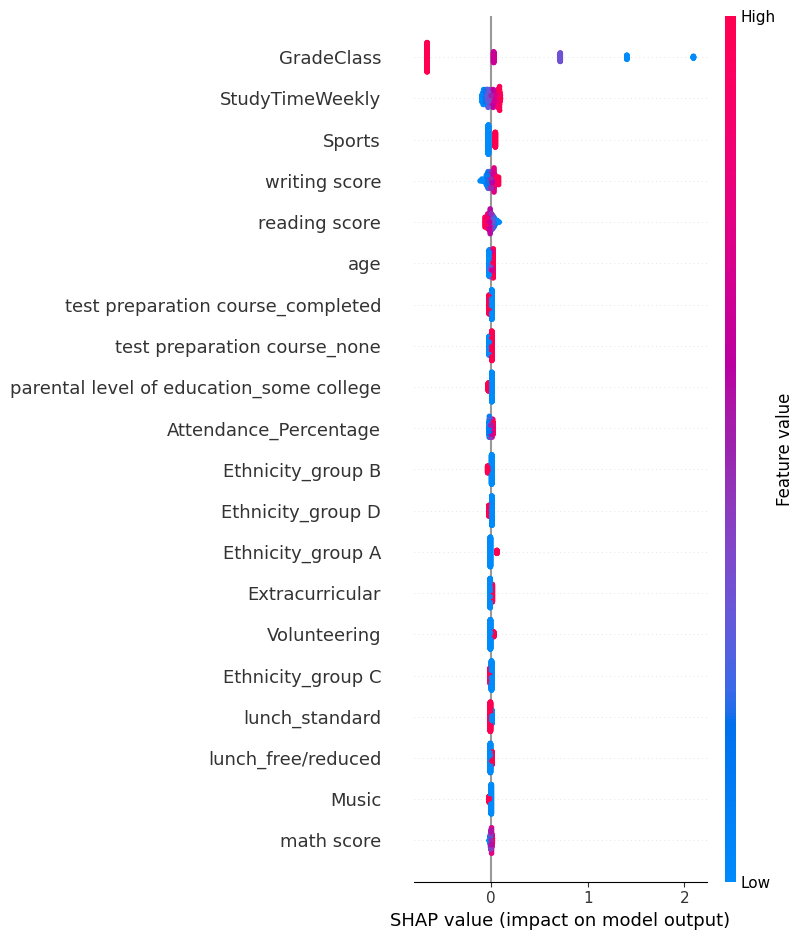

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import shap

# Load the data
student_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Student_performance.csv')

# Preprocessing
x = student_data.drop('GPA', axis=1)
y = student_data['GPA']

numeric_features = x.select_dtypes(include=['number']).columns
categorical_features = x.select_dtypes(include=['object']).columns

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

x = preprocessor.fit_transform(x)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

# Impute missing values in y_train
imputer_y = SimpleImputer(strategy='mean')
y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1))
y_train = y_train.ravel()

# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Get feature names after OneHotEncoding
feature_names = list(numeric_features) + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Explain the model's predictions using SHAP values
explainer = shap.Explainer(model, x_train)  # Use the training data for the explainer
shap_values = explainer(x_test) # Calculate SHAP values for the test data

# Visualize the SHAP values
shap.summary_plot(shap_values, x_test, feature_names=feature_names)